# preprocessing

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'  #Windows
# plt.rcParams['font.family']='AppleGothic'    # Mac

In [3]:
%matplotlib inline

In [4]:
df=pd.read_csv("../전체 데이터/김하연_원본데이터.csv",encoding='cp949',low_memory=False) # Mac
df=pd.read_csv("..\\전체 데이터\\김하연_원본데이터.csv",encoding='cp949',low_memory=False) # Windows

In [5]:
df.head()

,장소 POI에 대한 ID 구분 번호 체계,위치좌표 X축값,위치좌표 Y축값,구분,장소명,소재지,데이터기준일자
0,3,126.568803,33.236546,교통시설,동방파제,제주특별자치도 서귀포시 서귀동 758-2,2015-12-31
1,4,126.562554,33.235071,지명관련,새섬,제주특별자치도 서귀포시 서귀동 산 3-3,2015-12-31
2,5,126.599675,33.230314,지명관련,섶섬,제주특별자치도 서귀포시 보목동 산 1,2015-12-31
3,6,126.565891,33.226031,지명관련,문섬,제주특별자치도 서귀포시 서귀동 산 4,2015-12-31
4,7,126.516395,33.218414,지명관련,범섬,제주특별자치도 서귀포시 법환동 산 2,2015-12-31


In [6]:
df.columns

Index(['장소 POI에 대한 ID 구분 번호 체계 ', '위치좌표 X축값 ', '위치좌표 Y축값 ', '구분', '장소명', '소재지',
       '데이터기준일자'],
      dtype='object')

### 칼럼 정리

In [7]:
df = df.drop(['데이터기준일자'], axis=1)

In [8]:
df.head()

,장소 POI에 대한 ID 구분 번호 체계,위치좌표 X축값,위치좌표 Y축값,구분,장소명,소재지
0,3,126.568803,33.236546,교통시설,동방파제,제주특별자치도 서귀포시 서귀동 758-2
1,4,126.562554,33.235071,지명관련,새섬,제주특별자치도 서귀포시 서귀동 산 3-3
2,5,126.599675,33.230314,지명관련,섶섬,제주특별자치도 서귀포시 보목동 산 1
3,6,126.565891,33.226031,지명관련,문섬,제주특별자치도 서귀포시 서귀동 산 4
4,7,126.516395,33.218414,지명관련,범섬,제주특별자치도 서귀포시 법환동 산 2


### 이상치 제거

In [9]:
place_list=df['장소명'].unique().tolist()
# place_list

In [10]:
len(df['장소명'].unique().tolist())

65772

In [11]:
df=df[~df['장소명'].isin(['1', '2', '3','4','5','6','7','8','9'])]

In [12]:
real_list=[]

for i in range(1,1001):
    if str(i) in place_list:
        real_list.append(str(i))

print(real_list)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18']


In [13]:
df=df[~df['장소명'].isin(['10', '11', '12', '13', '14', '15', '16', '17', '18'])]

In [14]:
df=df[~df['장소명'].isin(['-'])]

In [15]:
df=df[~df['장소명'].isin(['N6',
 'N4',
 'N5',
 'N7',
 'S4',
 'S3',
 'S5',
 'N2',
 'N3',
 'N8',
 'N1',
 'S9',
 'S1',
 'S2',
 'S6',
 'S7',
 'S8',
 'E9',
 'N9',
 'E4',
 'E3',
 'E1',
 'E2',
 'E5',
 'E6',
 'E8',
 'E7'])]

### 시, 동 칼럼으로 나누기 

In [16]:
sido_list=[]
sido = df['소재지'].str.contains('제주시')
for i in range(len(df)):

    if sido.iloc[i] == True:
        sido_list.append('제주시')
        
    
    elif sido.iloc[i] == False:
        sido_list.append('서귀포시')
        
    else:
        pass
    
# print(sido_list)

In [17]:
sojaeji = []

for i in df['소재지'].str.split(' '):
    sojaeji.append(i[1])    

In [18]:
df['시구분'] = sojaeji

In [19]:
sojaeji2 = []

for i in df['소재지'].str.split(' '):
    sojaeji2.append(i[2])  

In [20]:
df['동구분'] = sojaeji2

In [21]:
df.head()

,장소 POI에 대한 ID 구분 번호 체계,위치좌표 X축값,위치좌표 Y축값,구분,장소명,소재지,시구분,동구분
0,3,126.568803,33.236546,교통시설,동방파제,제주특별자치도 서귀포시 서귀동 758-2,서귀포시,서귀동
1,4,126.562554,33.235071,지명관련,새섬,제주특별자치도 서귀포시 서귀동 산 3-3,서귀포시,서귀동
2,5,126.599675,33.230314,지명관련,섶섬,제주특별자치도 서귀포시 보목동 산 1,서귀포시,보목동
3,6,126.565891,33.226031,지명관련,문섬,제주특별자치도 서귀포시 서귀동 산 4,서귀포시,서귀동
4,7,126.516395,33.218414,지명관련,범섬,제주특별자치도 서귀포시 법환동 산 2,서귀포시,법환동


### 위도,경도 이상치 검사

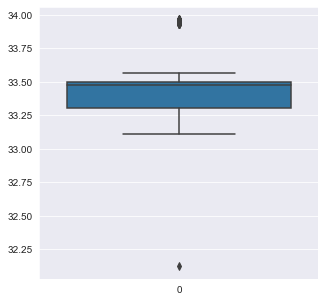

In [22]:
plt.figure(figsize=(5,5))

sns.set_style('darkgrid')
sns.boxplot(data=df['위치좌표 Y축값 '])

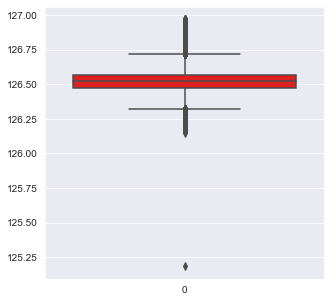

In [23]:
plt.figure(figsize=(5,5))

sns.set_style('darkgrid')
sns.boxplot(data=df['위치좌표 X축값 '],color='red')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd9a415a370>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd9a4d1aeb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd9a4d1ad60>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd9a36d5a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd9a415a8e0>],
 'means': []}

<Figure size 1080x576 with 0 Axes>

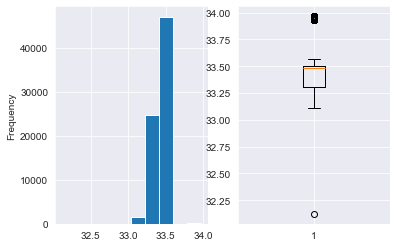

In [24]:
plt.figure(figsize = (15,8))
fig, ax = plt.subplots(1,2)

df['위치좌표 Y축값 '].plot(kind = 'hist', ax = ax[0])
plt.boxplot(df['위치좌표 Y축값 '])

In [25]:
first_quantile = df['위치좌표 Y축값 '].quantile(0.25)
third_quantile = df['위치좌표 Y축값 '].quantile(0.75)
print('1분위수 : ', first_quantile)
print('3분위수 : ', third_quantile)

df_quantile = df[(df['위치좌표 Y축값 '] >= first_quantile) & (df['위치좌표 Y축값 '] <= third_quantile)]
df_quantile.head()

1분위수 :  33.303386749999994
3분위수 :  33.500108000000004


,장소 POI에 대한 ID 구분 번호 체계,위치좌표 X축값,위치좌표 Y축값,구분,장소명,소재지,시구분,동구분
8,11,126.270300,33.425837,교육기관,수원초등학교,제주특별자치도 제주시 한림읍 대림리 1591,제주시,한림읍
9,12,126.312871,33.420172,교육기관,어도초등학교,제주특별자치도 제주시 애월읍 봉성리 3276,제주시,애월읍
10,13,126.293435,33.442419,교육기관,귀덕초등학교,제주특별자치도 제주시 한림읍 귀덕리 1118,제주시,한림읍
11,14,126.330457,33.435404,교육기관,납읍초등학교,제주특별자치도 제주시 애월읍 납읍리 1504-2,제주시,애월읍
12,15,126.437909,33.476643,지명관련,참오랭이,제주특별자치도 제주시 외도일동 21,제주시,외도일동


### 파일 저장

In [27]:
# df.to_csv('../전체 데이터/김하연_가공데이터.csv',index=False,encoding='cp949') # Mac
# df.to_csv('..\\전체 데이터\\김하연_가공데이터.csv',index=False,encoding='cp949') # Windwos